In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
from sklearn.datasets import make_blobs

# Modeling
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Get data

In [2]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [3]:
X, y = make_blobs(
        n_samples    = 500, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1.2, 
        shuffle      = True, 
        random_state = 0
       )
X.shape, y.shape

((500, 2), (500,))

In [4]:
np.unique(y)

array([0, 1, 2])

# Plots

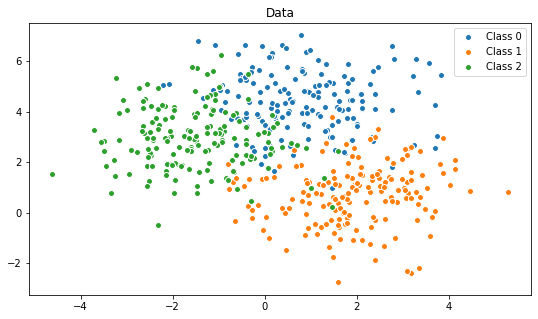

In [5]:
fig, ax = plt.subplots(figsize=(9, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0], y = X[y == i, 1], 
        marker    = 'o', edgecolor = 'white', 
        label= f"Class {i}"
    )
#plt.style.use('fivethirtyeight')

    
ax.set_title('Data')
ax.legend()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# MPLClassifier Model

## hidden_layer_sizes (val,)

In [6]:
model_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

model_2 = MLPClassifier(
                hidden_layer_sizes=(25),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )


model_1.fit(X=X, y=y)
model_2.fit(X=X, y=y)


MLPClassifier(hidden_layer_sizes=25, learning_rate_init=0.01, max_iter=1000,
              random_state=123, solver='lbfgs')

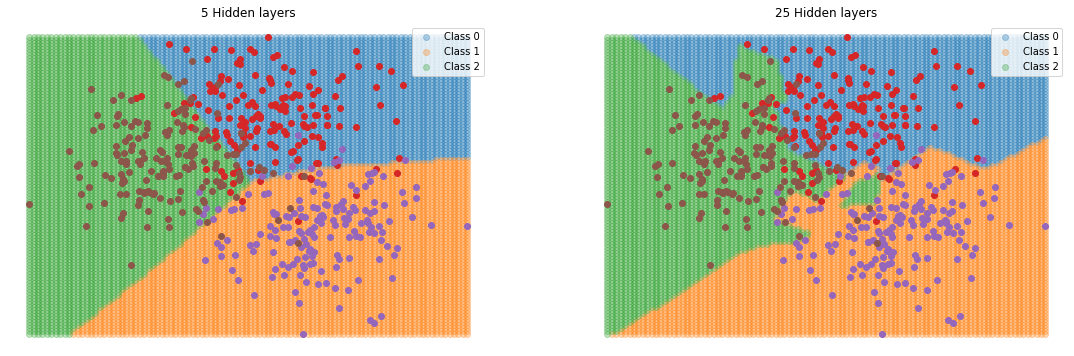

In [7]:
# Plots
#plt.style.use('seaborn-white')

fig, axs = plt.subplots(1, 2, figsize=(19,6))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, model in enumerate([model_1, model_2]):
    
    pred = model.predict(X_grid)
    
    for j in np.unique(pred):
        axs[i].scatter(
            x = X_grid[pred == j, 0], y = X_grid[pred == j, 1], 
            marker = 'o', alpha = 0.3,
            label= f"Class {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],  y = X[y == j, 1], 
            marker    = 'o',
        )
        
    axs[i].set_title(f"{model.hidden_layer_sizes} Hidden layers")
    axs[i].axis('off')
    axs[i].legend();


## hidden_layer_sizes (val, val, val)

In [8]:
model_3 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

model_4 = MLPClassifier(
                hidden_layer_sizes=(100),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

model_5 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

model_6 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

model_3.fit(X=X, y=y)
model_4.fit(X=X, y=y)
model_5.fit(X=X, y=y)
model_6.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

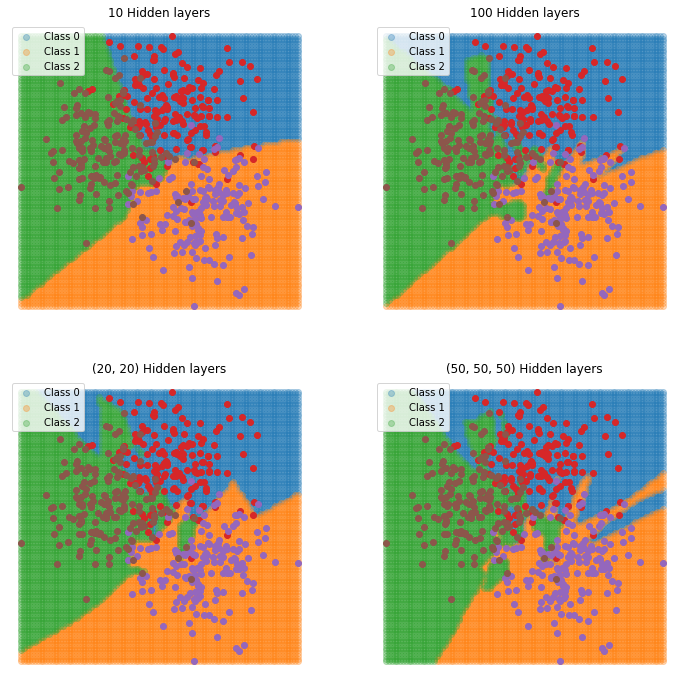

In [9]:
# Plots

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, model in enumerate([model_3, model_4, model_5, model_6]):
    
    pred = model.predict(X_grid)
    
    for j in np.unique(pred):
        axs[i].scatter(
            x = X_grid[pred == j, 0], y = X_grid[pred == j, 1], 
            marker = 'o', alpha = 0.3,
            label= f"Class {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],  y = X[y == j, 1], 
            marker    = 'o',
        )
        
    axs[i].set_title(f"{model.hidden_layer_sizes} Hidden layers")
    axs[i].axis('off')
    axs[i].legend();


# hyperparameter tuning -- GridSearch

In [10]:
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

In [11]:
# learning curves
scores = pd.DataFrame(grid.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041975,0.006780,0.000594,0.000253,1,{'hidden_layer_sizes': 1},0.73,0.70,0.72,0.70,...,0.716,0.013565,6,0.7000,0.7075,0.7475,0.7050,0.7375,0.7195,0.019196
1,0.092307,0.029600,0.000384,0.000015,5,{'hidden_layer_sizes': 5},0.90,0.88,0.91,0.85,...,0.870,0.036332,2,0.8725,0.8750,0.8675,0.8800,0.9000,0.8790,0.011247
2,0.456659,0.555864,0.000454,0.000050,10,{'hidden_layer_sizes': 10},0.89,0.89,0.93,0.86,...,0.876,0.039799,1,0.8775,0.8825,0.8675,0.8975,0.9025,0.8855,0.012884
3,0.421609,0.136476,0.000637,0.000368,15,{'hidden_layer_sizes': 15},0.88,0.86,0.92,0.85,...,0.860,0.042426,3,0.8975,0.9000,0.8775,0.9050,0.8950,0.8950,0.009354
4,0.632819,0.392951,0.000412,0.000022,25,{'hidden_layer_sizes': 25},0.89,0.81,0.86,0.81,...,0.836,0.033226,5,0.8950,0.9175,0.9025,0.9300,0.9050,0.9100,0.012349
5,1.179792,0.547068,0.000477,0.000037,50,{'hidden_layer_sizes': 50},0.85,0.85,0.86,0.87,...,0.844,0.028000,4,0.9050,0.9325,0.9175,0.9525,0.9550,0.9325,0.019429


Text(0.5, 0, '')

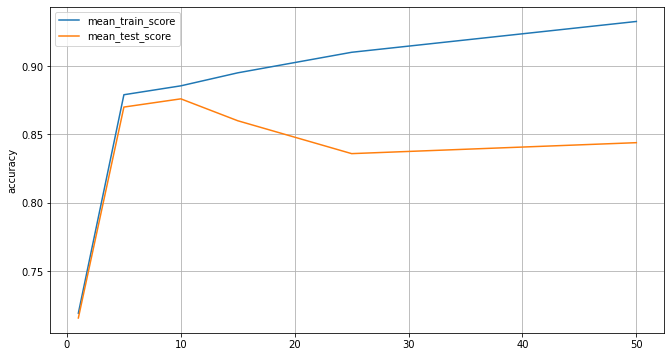

In [12]:
fig, ax = plt.subplots(figsize=(11, 6))
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.grid()
ax.set_xlabel('')

In [13]:
# learning rate
# ==============================================================================
param_grid = {'learning_rate_init':[0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(10),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

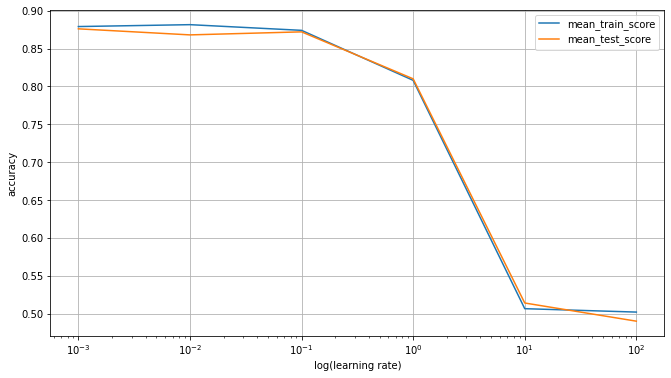

In [14]:
fig, ax = plt.subplots(figsize=(11, 6))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score' ,ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.grid()
ax.set_ylabel('accuracy');

# RandomizedSearchCV

In [15]:
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# RandomizedSearchCV
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # maximal number of combinations
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

# Results
res = pd.DataFrame(grid.cv_results_)
res.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
49,0.1,10,100.0,0.869899,0.042016,0.873973,0.021077
46,0.01,10,100.0,0.869899,0.042016,0.873973,0.021077
30,0.01,10,10.0,0.867915,0.037310,0.876979,0.021892
28,0.1,10,1.0,0.867903,0.048513,0.888976,0.022565
41,0.001,10,10.0,0.865919,0.037716,0.876976,0.022578
21,0.1,"(20, 20)",10.0,0.865919,0.037716,0.878978,0.023269
34,0.1,"(10, 10)",10.0,0.863923,0.038326,0.881981,0.024880
7,0.01,"(10, 10)",10.0,0.863923,0.035070,0.875975,0.022360
1,0.001,"(10, 10)",10.0,0.863923,0.035070,0.877980,0.020517
3,0.01,"(10, 10)",1.0,0.863899,0.047880,0.892983,0.016420


 *     **=============   Best model     =============**

In [21]:
best_model = grid.best_estimator_
best_model

MLPClassifier(alpha=100.0, hidden_layer_sizes=10, learning_rate_init=0.01,
              max_iter=2000, solver='lbfgs')

 *     **=============   make predictions     =============**

In [22]:
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
y_pred = best_model.predict(X_grid)
y_pred

array([2, 2, 2, ..., 0, 0, 0])

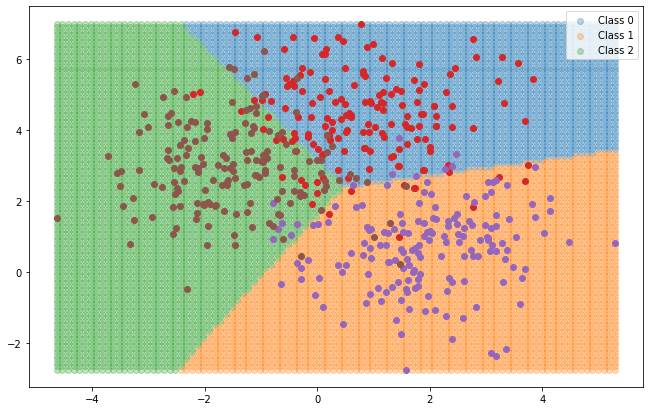

In [23]:
# Plots
fig, ax = plt.subplots(figsize=(11, 7))

for i in np.unique(y_pred):
    ax.scatter(
        x = X_grid[y_pred == i, 0], y = X_grid[y_pred == i, 1], 
        marker = 'o', alpha = 0.3,
        label= f"Class {i}"
    )

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0], y = X[y == i, 1], 
        marker    = 'o'
    )
    
ax.legend();

In [19]:
best_model

MLPClassifier(alpha=100.0, hidden_layer_sizes=10, learning_rate_init=0.01,
              max_iter=2000, solver='lbfgs')

In [25]:
 # END